In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [2]:
def featureNormalize(X):
    """This function takes the features as input and
     returns the normalized values, the mean, as well 
     as the standard deviation for each feature."""
    X_norm = (X - np.mean(X))/np.std(X) # Scaling function. 
    mu = np.mean(X) # Define the mean 
    sigma = np.std(X) # Define the standard deviation. 
    return X_norm, mu, sigma # return the values.

In [3]:
def computeCostMulti(X,y, theta):
    '''
    This function takes in the X and y matrices as well as the 
    initial theta values(coefficients) and returns the cost(error of             
    prediction)
    '''
    m = len(y)              #This is the length of the training set
    h = X.dot(theta)        #The hypothesis
    J = 1/(2*m)*(np.sum((h-y)**2))             #The cost function
    return J                #return the cost

In [4]:
def gradientDescentMulti(X, y, theta, alpha, nbr_iter):
    '''
    This function takes in the X and y matrices, the initial theta
    values(coefficients), the learning rate, and the number of 
    iterations. The output will be the a new set of coefficient of 
    the linear regression (theta), optimized for making predictions.
    '''   
    
    J_history = []        #Array for storing the cost values for each iteration
    m = len(y)            #This is the length of the training set
    
    for i in range(nbr_iter):             #Loop for 400 iterations
        h = X.dot(theta) # The hypothesis
        theta = theta - (alpha/m)*(X.T.dot(h-y))   #Gradient descent
                                                   #function        
        J_history.append(computeCostMulti(X, y, theta))  #Append the cost to the J_history array    
    return theta, J_history     #return the final values of theta and the J_history array

In [5]:
def prediction(X, new_theta):
    '''
    This function takes in features and predicts output.
    '''
    pred = np.dot(X,new_theta)  #We use the new coefficients.
    return pred 

In [6]:
X,y = make_regression(n_samples=100, n_features=10)
m = len(y)
n = X.shape[1]
X, mean, std = featureNormalize(X)
X = np.append(np.ones([m,1]), X, axis=1)#Append the bias term to X and reshape X to mx1 matrix
y = np.array(y).reshape(-1,1) #Reshape y to mx1 matrix
theta = np.zeros([n+1,1])
cost = computeCostMulti(X,y, theta)  #Call the function and pass in values for X, y, and theta to compute the cost.
print(cost)                     #Print out the cost

17624.305480425395


In [7]:
nbr_iter = 400 ## Number of iterations.
alpha = 0.01 ## Learning rate
new_theta, J_history = gradientDescentMulti(X, y, theta, alpha, nbr_iter)
print(new_theta)

[[ 4.83482357]
 [78.01982248]
 [61.23980985]
 [46.35499193]
 [20.92419553]
 [35.63959079]
 [23.40656491]
 [75.07690098]
 [57.33588728]
 [81.01038616]
 [10.89555821]]


In [8]:
new_cost = computeCostMulti(X,y, new_theta)
print(new_cost)

8.191080902659419


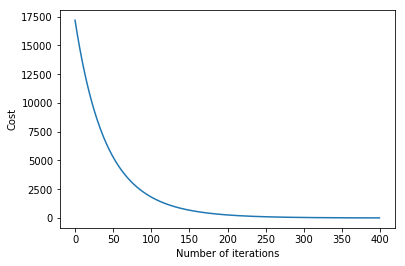

In [9]:
plt.plot(range(len(J_history)),J_history)
plt.ylabel('Cost')
plt.xlabel('Number of iterations')
plt.show()

In [10]:
X = np.array([10,10,10,10,10,10,10,10,10,10])
X = (X - mean)/std 
X = np.append(1, X) 
X = np.reshape(X, (1,n+1))
print(X) 
pred = prediction(X, theta)
print(pred)

[[ 1.         10.16839339 10.16839339 10.16839339 10.16839339 10.16839339
  10.16839339 10.16839339 10.16839339 10.16839339 10.16839339]]
[[0.]]
